In [30]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np
import netCDF4

def t_contour(ax, df, vname, interval, extend, units=None, time=None, title=None):

    if vname == 'salinity':
        pv = df.pivot(index='date_hour', columns='layer', values='salilnity')
    else:
        pv = df.pivot(index='date_hour', columns='layer', values=vname)
    date = pv.index
    depth = pv.columns
    if vname == 'chlorophyll':
        value = pv.values.T * 2.18
    else:
        value = pv.values.T

    #fig, ax = plt.subplots(figsize=(10,3))
    #fig, ax = plt.subplots(figsize=(12,2))
    cf = ax.contourf(date, -depth, value, interval, extend=extend)
    cb = plt.colorbar(cf, ax=ax)
    
    if units is not None:
        cb.set_label('{} [{}]'.format(vname, units))
    else:
        cb.set_label(vname)
    
    if title is not None: ax.set_title(title)
    ax.xaxis.set_major_formatter( DateFormatter('%d') )
    ax.set_ylabel('depth(m)')
    ax.set_ylim(-13.5, 0)
    
    ax.set_xlim(dt.datetime(2012,8,1), dt.datetime(2012,8,31))
    
#import matplotlib

#matplotlib.rcParams['font.family'] = 'Arial'

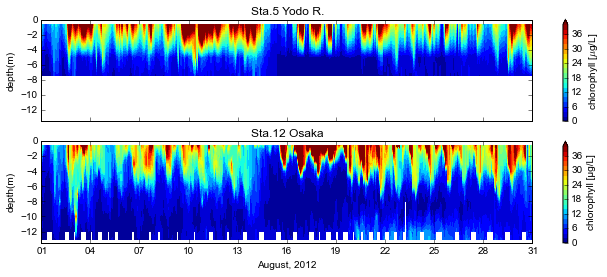

In [37]:
fig, ax = plt.subplots(2,1,figsize=(11,4))

obsfile = '/Users/teruhisa/Dropbox/Data/obweb/obweb/yodo_q1.csv'
title = 'Sta.5 Yodo R.'
df = pd.read_csv(obsfile, parse_dates=[['date','hour']], na_values='*')
t_contour(ax[0], df, 'chlorophyll', np.arange(0,41,2), 'max', '$\mu$g/L', title=title)


obsfile1 = '/Users/teruhisa/Dropbox/Data/obweb/obweb/osaka_q1.csv'
title1 = 'Sta.12 Osaka'
df1 = pd.read_csv(obsfile1, parse_dates=[['date','hour']], na_values='*')
t_contour(ax[1], df1, 'chlorophyll', np.arange(0,41,2), 'max', 'μg/L', title=title1)


ax[0].tick_params(labelbottom='off')
ax[1].set_xlabel('August, 2012')
    
plt.savefig('2015kaiko_obs.png', bbox_inches='tight', transparent=True)